In [1]:
import requests

import quandl
import numpy as np 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import time

In [2]:
API_KEY = 'FX4G796PF7RW3855'
TIME = 'TIME_SERIES_DAILY'
SYMBOL = 'MSFT'

In [3]:
r = requests.get('https://www.alphavantage.co/query?function=' + TIME + '&symbol=' + SYMBOL + '&apikey=' + API_KEY)

if (r.status_code == 200):
    print ('Sucess')
    # print (r.json())

Sucess


In [4]:
result = r.json()
dataForAllDays = result['Time Series (Daily)']
dataForSingleDate = dataForAllDays['2019-11-20']
print (dataForSingleDate['1. open'])
print (dataForSingleDate['2. high'])
print (dataForSingleDate['3. low'])
print (dataForSingleDate['4. close'])
print (dataForSingleDate['5. volume'])

150.3100
150.8400
148.4600
149.6200
25720060


In [5]:
print(type(result))
print(len(result))
print(result.keys())


<class 'dict'>
2
dict_keys(['Meta Data', 'Time Series (Daily)'])


In [6]:
Keys = result.keys()
Key = []
for val in Keys:
    Key.append(val)
# print(Key)

Date = result.get(Key[1])
print(type(Date))
print(len(Date))
print(Date.keys())

<class 'dict'>
100
dict_keys(['2019-11-25', '2019-11-22', '2019-11-21', '2019-11-20', '2019-11-19', '2019-11-18', '2019-11-15', '2019-11-14', '2019-11-13', '2019-11-12', '2019-11-11', '2019-11-08', '2019-11-07', '2019-11-06', '2019-11-05', '2019-11-04', '2019-11-01', '2019-10-31', '2019-10-30', '2019-10-29', '2019-10-28', '2019-10-25', '2019-10-24', '2019-10-23', '2019-10-22', '2019-10-21', '2019-10-18', '2019-10-17', '2019-10-16', '2019-10-15', '2019-10-14', '2019-10-11', '2019-10-10', '2019-10-09', '2019-10-08', '2019-10-07', '2019-10-04', '2019-10-03', '2019-10-02', '2019-10-01', '2019-09-30', '2019-09-27', '2019-09-26', '2019-09-25', '2019-09-24', '2019-09-23', '2019-09-20', '2019-09-19', '2019-09-18', '2019-09-17', '2019-09-16', '2019-09-13', '2019-09-12', '2019-09-11', '2019-09-10', '2019-09-09', '2019-09-06', '2019-09-05', '2019-09-04', '2019-09-03', '2019-08-30', '2019-08-29', '2019-08-28', '2019-08-27', '2019-08-26', '2019-08-23', '2019-08-22', '2019-08-21', '2019-08-20', '201

In [7]:
DKeys = Date.keys()
DKey = []
for val in DKeys:
    DKey.append(val)

DKey.reverse()
# print(DKey)

AData = Date.get(DKey[1])
print(AData)
print(type(AData))
print(len(AData))
print(AData.keys())
print(AData.get('1. open'))

{'1. open': '136.0000', '2. high': '136.9700', '3. low': '135.8000', '4. close': '136.4600', '5. volume': '19953097'}
<class 'dict'>
5
dict_keys(['1. open', '2. high', '3. low', '4. close', '5. volume'])
136.0000


In [19]:
# if not 'Open' in locals():
#     print('sa')

In [33]:
if not 'Open' in locals():
    Open = []
    High = []
    Low = []
    Close = []
    Vol = []
else:
    Open.clear()
    High.clear()
    Low.clear()
    Close.clear()
    Vol.clear()

for val in DKey:
    temp = Date.get(val)
    #print(temp)
    Open.append(float(temp.get('1. open')))
    High.append(float(temp.get('2. high')))
    Low.append(float(temp.get('3. low')))
    Close.append(float(temp.get('4. close')))
    Vol.append(float(temp.get('5. volume')))
    
# print(Open)
    

In [208]:
# A variable for predicting 'n' days out into the future
forecast_out = 50 #'n=30' days

In [209]:
print(type(Open))
print(type(Open[1]))


<class 'list'>
<class 'float'>


In [210]:
prClose = Close[forecast_out:]

print (len(prClose))
print(len(Close))
dummy = np.ones(len(prClose), dtype=float)

print(len(dummy))
# X = np.concatenate((np.array(Close[:-forecast_out]).reshape(-1,1), dummy.reshape(-1,1)), axis = 1)
X = np.array(Close[:-forecast_out]).reshape(-1,1)
Y = prClose

print (len(X))
# print(X)
print(len(Y))

50
100
50
50
50


In [211]:
# Split the data into 80% training and 20% testing
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [212]:
# Create and train the Linear Regression  Model
lr = LinearRegression()
# Train the model
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [213]:
# Testing Model: Score returns the coefficient of determination R^2 of the prediction. 
# The best possible score is 1.0
lr_confidence = lr.score(x_test, y_test)
print("lr confidence: ", lr_confidence)

lr confidence:  -0.3768053919493084


In [214]:
# predClose = lr.predict(x_test)
predClose = lr.predict(np.array(Close).reshape(-1,1))

# cur = X[-forecast_out]
cur = np.array(Close[-1]).reshape(1)

print(cur)
# print(type(predClose[-1]))
print(type(predClose[-1]))

print(type(cur))
print(cur.shape)
# print(type(cur2))
# print(cur2.shape)

print(len(Close))

predClose = list(predClose)
print(len(predClose))

for i in range(forecast_out):
    val = lr.predict([cur])
    predClose.append(float(val))
    cur = val
    
print(len(predClose))
# print(predClose)
    

[151.23]
<class 'numpy.float64'>
<class 'numpy.ndarray'>
(1,)
100
100
150


In [215]:
print(len(Close))
h = list(range(0,len(Close)))
m = list(range(h[-1]+1,h[-1]+forecast_out+1))
print(m)

100
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149]


<IPython.core.display.Javascript object>


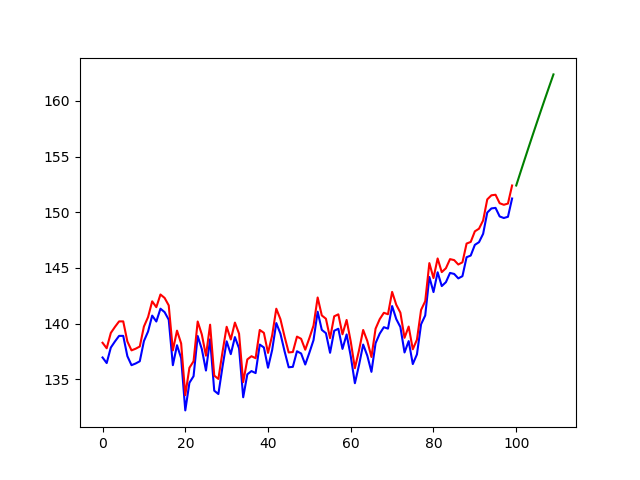

In [207]:
plt.plot(h,Close, color = 'b')
plt.plot(h,predClose[:-forecast_out] , color = 'r')
plt.plot(m,predClose[-forecast_out:] , color = 'g')
